In [75]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy import signal
from scipy.fftpack import dct
from glob import glob
import librosa
import librosa.display
%matplotlib inline

In [76]:
# name parent directory
DIR = 'C:/Users/keboc/Documents/Gideon/Dataset'

In [77]:
LABELS = 'English Yoruba Igbo'.split()

In [78]:
# Catalogue files in a tabular format

wav_files = glob(os.path.join(DIR, '*/*wav'))
wav_files = [x.split(sep='\\')[1] + '/' + x.split(sep='\\')[2] for x in wav_files]

data = []
for e in wav_files:            
    label, name = e.split('/')
    if label in LABELS:
        label_id = LABELS.index(label)
        fle = os.path.join(DIR, e)

        sample = (label, label_id, name, fle)
        data.append(sample)
# Data Frames with samples' labels and paths     
df = pd.DataFrame(data, columns = ['label', 'label_id', 'user_id', 'wav_file'])

In [79]:
df

,label,label_id,user_id,wav_file
0,English,0,arctic_a0001.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
1,English,0,arctic_a0002.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
2,English,0,arctic_a0003.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
3,English,0,arctic_a0004.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
4,English,0,arctic_a0005.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
5,English,0,arctic_a0006.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
6,English,0,arctic_a0007.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
7,English,0,arctic_a0008.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
8,English,0,arctic_a0009.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...
9,English,0,arctic_a0010.wav,C:/Users/keboc/Documents/Gideon/Dataset\Englis...


In [80]:
# reshuffle table 
datf = df.sample(frac=1)
datf.reset_index(drop=True,inplace=True)

In [81]:
print('Shape: ',datf.shape)
datf

Shape:  (2097, 4)


,label,label_id,user_id,wav_file
0,Yoruba,1,Yoruba TESTSET 31.wav,C:/Users/keboc/Documents/Gideon/Dataset\Yoruba...
1,Igbo,2,IgboThirdRound- 21.wav,C:/Users/keboc/Documents/Gideon/Dataset\Igbo/I...
2,Yoruba,1,Yoruba PART two - 93.wav,C:/Users/keboc/Documents/Gideon/Dataset\Yoruba...
3,Yoruba,1,Yoruba PART Four - 122.wav,C:/Users/keboc/Documents/Gideon/Dataset\Yoruba...
4,Yoruba,1,Yoruba PART three - 22.wav,C:/Users/keboc/Documents/Gideon/Dataset\Yoruba...
5,Yoruba,1,Yoruba PART three - 34.wav,C:/Users/keboc/Documents/Gideon/Dataset\Yoruba...
6,Igbo,2,IgboTestSetSecond- 58.wav,C:/Users/keboc/Documents/Gideon/Dataset\Igbo/I...
7,Igbo,2,Igbo 6.wav,C:/Users/keboc/Documents/Gideon/Dataset\Igbo/I...
8,Yoruba,1,Yoruba PART three - 36.wav,C:/Users/keboc/Documents/Gideon/Dataset\Yoruba...
9,Yoruba,1,Yoruba PART Four - 189.wav,C:/Users/keboc/Documents/Gideon/Dataset\Yoruba...


(128, 128)


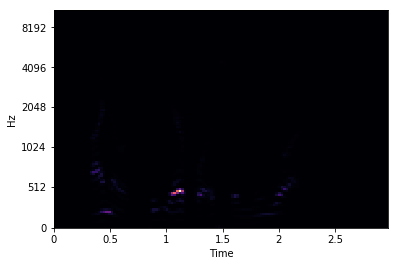

In [82]:
# English wave Spectagram example

y, sr = librosa.load(datf[datf.label=='English'].wav_file.values[9],duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)

print(ps.shape)

librosa.display.specshow(ps, y_axis='mel', x_axis='time')

(128, 128)


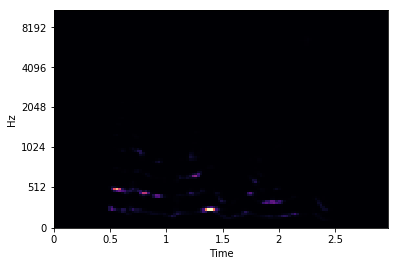

In [83]:
# Yoruba wave Spectagram example

y, sr = librosa.load(datf[datf.label=='Yoruba'].wav_file.values[8],duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)

print(ps.shape)

librosa.display.specshow(ps, y_axis='mel', x_axis='time')

(128, 128)


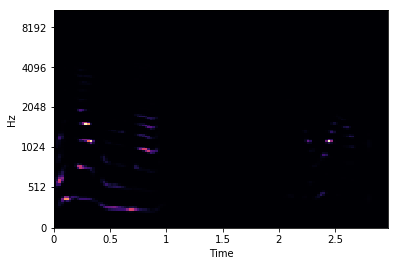

In [84]:
# Igbo wave Spectagram example

y, sr = librosa.load(datf[datf.label=='Igbo'].wav_file.values[13],duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)

print(ps.shape)

librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [85]:
# Convert files to mel-spectogrm and save in array Data

Data = [] 

for row in datf.itertuples():
    y, sr = librosa.load(row.wav_file, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    # Discard samples without uniform size
    if ps.shape != (128, 128): continue
    Data.append( (ps, row.label_id) )

In [86]:
print("Number of samples: ", len(Data))

Number of samples:  1797


In [87]:
# SAmple of the representation
Data[1007]

(array([[2.19802913e-03, 3.46448998e-03, 1.69691533e-02, ...,
         9.90695479e-03, 4.86343288e-03, 2.02400266e-03],
        [1.21589574e-03, 5.09247911e-03, 2.30566232e-02, ...,
         7.46479251e-03, 3.66490262e-03, 5.05562177e-03],
        [1.44038994e-03, 1.72524267e-03, 3.20529697e-03, ...,
         1.25191813e-03, 1.16377785e-03, 1.18347879e-03],
        ...,
        [1.28034086e-08, 3.20084089e-09, 6.57833285e-18, ...,
         2.74610949e-18, 1.22509686e-13, 1.37617666e-09],
        [1.25136107e-08, 3.12839196e-09, 7.86800898e-18, ...,
         3.56454375e-18, 1.19572532e-13, 1.34313673e-09],
        [1.23319585e-08, 3.08297896e-09, 3.84134471e-18, ...,
         2.84991219e-18, 1.17773267e-13, 1.32284849e-09]]), 0)

In [88]:
import keras
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import sklearn
from sklearn.model_selection import train_test_split

dataset = Data
x,y = zip(*dataset)

# Split train and test datset

train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(x, y, train_size=0.80)
print('Size of train set', np.shape(labels_train))
print('Size of test set', np.shape(labels_test))

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in test])



Size of train set (1437,)
Size of test set (360,)


c:\users\keboc\anaconda3\envs\tensorflow_1.8\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [89]:
input_shape=(128, 128, 1)

In [90]:
# One-Hot encoding for classes
encoder = LabelEncoder()
encoder.fit(labels_train)
y_train = encoder.transform(labels_train)
encoder.fit(labels_test)
y_test = encoder.transform(labels_test)

y_train = np.array(keras.utils.to_categorical(y_train, len(LABELS)))
y_test = np.array(keras.utils.to_categorical(y_test, len(LABELS)))

In [91]:
# Build model

In [92]:
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D, BatchNormalization
from keras.layers import Input, Dense, Dropout, Flatten,Reshape
from keras.layers import LSTM, Bidirectional
from keras.models import Model, load_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [93]:
def deep_cnn(features_shape, num_classes, act='relu'):

     # Input
    x = Input(name='inputs', shape=features_shape, dtype='float32')
    o = x
    
    # Block 1
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=1, name='block1_conv', input_shape=features_shape)(o)
    o = MaxPooling2D((3, 3), strides=(2,2), padding='same', name='block1_pool')(o)
    o = BatchNormalization(name='block1_norm')(o)
    
    # Block 2
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=1, name='block2_conv')(o)
    o = MaxPooling2D((3, 3), strides=(2,2), padding='same', name='block2_pool')(o)
    o = BatchNormalization(name='block2_norm')(o)

    # Block 3
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=1, name='block3_conv')(o)
    o = MaxPooling2D((3, 3), strides=(2,2), padding='same', name='block3_pool')(o)
    o = BatchNormalization(name='block3_norm')(o)
    
    # Block 4
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=1, name='block4_conv')(o)
    o = MaxPooling2D((3, 3), strides=(2,2), padding='same', name='block4_pool')(o)
    o = BatchNormalization(name='block4_norm')(o)
    
    # Block 5
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=1, name='block5_conv')(o)
    o = MaxPooling2D((3, 3), strides=(2,2), padding='same', name='block5_pool')(o)
    o = BatchNormalization(name='block5_norm')(o)
    
    # Block 6
    o = Conv2D(32, (3, 3), activation=act, padding='same', strides=1, name='block6_conv')(o)
    o = MaxPooling2D((3, 3), strides=(2,2), padding='same', name='block6_pool')(o)
    o = BatchNormalization(name='block6_norm')(o)
    
    
     #CNN TO LSTM 
    o = Reshape(target_shape=((2, 64)), name='reshape')(o)  
    o = Dense(64, activation='relu', kernel_initializer='he_normal', name='dense1')(o) 

    
    o = Bidirectional(LSTM(100,dropout=0.2,return_sequences=True, recurrent_dropout=0.2))(o)
    o = Bidirectional(LSTM(100,dropout=0.2,return_sequences=True, recurrent_dropout=0.2))(o)


    # Flatten
    o = Flatten(name='flatten')(o)
    
    # Dense layer
    o = Dense(64, activation=act, name='dense')(o)
    o = BatchNormalization(name='dense_norm')(o)
    o = Dropout(0.2, name='dropout')(o)
    
    # Predictions
    o = Dense(num_classes, activation='softmax', name='pred')(o)

    # Print network summary
    Model(inputs=x, outputs=o).summary()
    
    return Model(inputs=x, outputs=o)


In [94]:

mode = deep_cnn(input_shape, len(LABELS))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 128, 128, 1)       0         
_________________________________________________________________
block1_conv (Conv2D)         (None, 128, 128, 32)      320       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 32)        0         
_________________________________________________________________
block1_norm (BatchNormalizat (None, 64, 64, 32)        128       
_________________________________________________________________
block2_conv (Conv2D)         (None, 64, 64, 32)        9248      
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 32)        0         
_________________________________________________________________
block2_norm (BatchNormalizat (None, 32, 32, 32)        128       
__________

In [95]:
mode.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [96]:
checkpointer = ModelCheckpoint(filepath="modeel.h5",
                               verbose=0, monitor = 'val_acc',
                               save_best_only=True)

In [97]:
history = mode.fit(x=X_train, y=y_train,
    epochs=100,
    batch_size=128,
    validation_data= (X_test, y_test),callbacks=[checkpointer])

Train on 1437 samples, validate on 360 samples
Epoch 1/100
1437/1437 [==============================] - 10s 7ms/step - loss: 0.7436 - acc: 0.6875 - val_loss: 0.7498 - val_acc: 0.6611
Epoch 2/100
1437/1437 [==============================] - 2s 2ms/step - loss: 0.4456 - acc: 0.8511 - val_loss: 1.4998 - val_acc: 0.5139
Epoch 3/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.3389 - acc: 0.8831 - val_loss: 1.1818 - val_acc: 0.5500
Epoch 4/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.2689 - acc: 0.9047 - val_loss: 2.0069 - val_acc: 0.5111
Epoch 5/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.2000 - acc: 0.9290 - val_loss: 3.3247 - val_acc: 0.4056
Epoch 6/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.1712 - acc: 0.9415 - val_loss: 3.9672 - val_acc: 0.4528
Epoch 7/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.1362 - acc: 0.9506 - val_loss: 4.1880 - val_acc: 0.4722
Epoch 8

Epoch 61/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.0074 - acc: 0.9965 - val_loss: 4.7438 - val_acc: 0.5333
Epoch 62/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.0048 - acc: 0.9993 - val_loss: 4.5825 - val_acc: 0.4806
Epoch 63/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.2842 - val_acc: 0.4944
Epoch 64/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.0054 - acc: 0.9986 - val_loss: 2.3865 - val_acc: 0.4833
Epoch 65/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.0096 - acc: 0.9965 - val_loss: 1.9839 - val_acc: 0.6333
Epoch 66/100
1437/1437 [==============================] - 2s 2ms/step - loss: 0.0063 - acc: 0.9979 - val_loss: 3.2941 - val_acc: 0.5583
Epoch 67/100
1437/1437 [==============================] - 2s 1ms/step - loss: 0.0066 - acc: 0.9993 - val_loss: 3.3864 - val_acc: 0.5778
Epoch 68/100
1437/1437 [========================

In [98]:
mode= load_model('modeel.h5')
scores = mode.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 95.56%


In [99]:
y_predpro = mode.predict(X_test,batch_size=32)

In [100]:
y_pred = np.argmax(y_predpro, axis=1)

English --- 0
Yoruba --- 1
Igbo --- 2


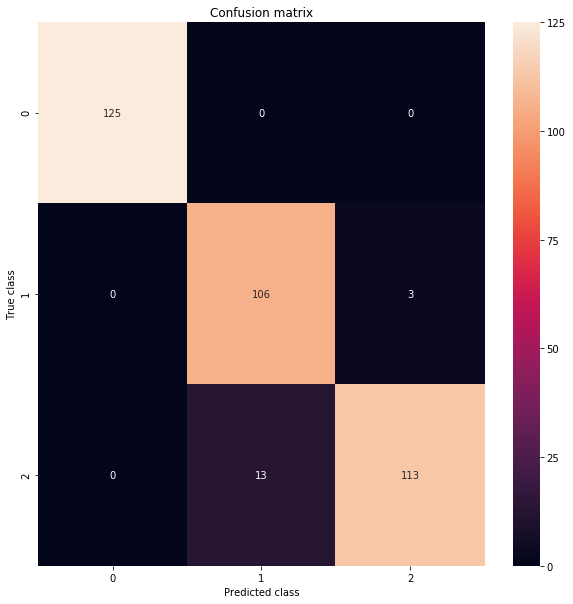

In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

for i in LABELS:
    print(i ,'---', LABELS.index(i))

conf_matrix = confusion_matrix(labels_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix,  annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [102]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, y_pred, target_names=LABELS))

              precision    recall  f1-score   support

     English       1.00      1.00      1.00       125
      Yoruba       0.89      0.97      0.93       109
        Igbo       0.97      0.90      0.93       126

   micro avg       0.96      0.96      0.96       360
   macro avg       0.95      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



In [103]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


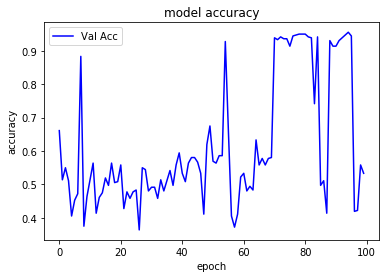

In [104]:
plt.figure()
#plt.plot(history.history['acc'],'orange',label='Train Acc')
plt.plot(history.history['val_acc'],'blue',label='Val Acc')
#plt.plot(history.history['loss'],'red',label='Train Loss')
#plt.plot(history.history['val_loss'],'green',label='Val Loss')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

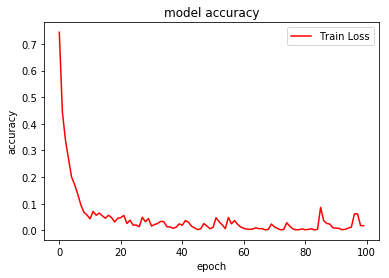

In [105]:
plt.figure()
#plt.plot(history.history['acc'],'orange',label='Train Acc')
# plt.plot(history.history['val_acc'],'blue',label='Val Acc')
plt.plot(history.history['loss'],'red',label='Train Loss')
#plt.plot(history.history['val_loss'],'green',label='Val Loss')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()